In [1]:
filename = "VOC2012/ImageSets/Main/trainval.txt"

with open(filename) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    

In [2]:
lines

['2008_000002',
 '2008_000003',
 '2008_000007',
 '2008_000008',
 '2008_000009',
 '2008_000015',
 '2008_000016',
 '2008_000019',
 '2008_000021',
 '2008_000023',
 '2008_000026',
 '2008_000027',
 '2008_000028',
 '2008_000032',
 '2008_000033',
 '2008_000034',
 '2008_000036',
 '2008_000037',
 '2008_000041',
 '2008_000042',
 '2008_000043',
 '2008_000045',
 '2008_000050',
 '2008_000051',
 '2008_000052',
 '2008_000053',
 '2008_000054',
 '2008_000056',
 '2008_000059',
 '2008_000060',
 '2008_000062',
 '2008_000064',
 '2008_000066',
 '2008_000067',
 '2008_000070',
 '2008_000073',
 '2008_000074',
 '2008_000075',
 '2008_000076',
 '2008_000078',
 '2008_000080',
 '2008_000082',
 '2008_000084',
 '2008_000085',
 '2008_000089',
 '2008_000090',
 '2008_000093',
 '2008_000095',
 '2008_000096',
 '2008_000097',
 '2008_000099',
 '2008_000103',
 '2008_000105',
 '2008_000107',
 '2008_000109',
 '2008_000112',
 '2008_000115',
 '2008_000116',
 '2008_000119',
 '2008_000120',
 '2008_000123',
 '2008_000128',
 '2008_0

In [3]:
imgDir = "VOC2012/JPEGImages/"
img = []

for i,x in enumerate(lines):
    img.append(imgDir + x + ".jpg")

In [4]:
img

['VOC2012/JPEGImages/2008_000002.jpg',
 'VOC2012/JPEGImages/2008_000003.jpg',
 'VOC2012/JPEGImages/2008_000007.jpg',
 'VOC2012/JPEGImages/2008_000008.jpg',
 'VOC2012/JPEGImages/2008_000009.jpg',
 'VOC2012/JPEGImages/2008_000015.jpg',
 'VOC2012/JPEGImages/2008_000016.jpg',
 'VOC2012/JPEGImages/2008_000019.jpg',
 'VOC2012/JPEGImages/2008_000021.jpg',
 'VOC2012/JPEGImages/2008_000023.jpg',
 'VOC2012/JPEGImages/2008_000026.jpg',
 'VOC2012/JPEGImages/2008_000027.jpg',
 'VOC2012/JPEGImages/2008_000028.jpg',
 'VOC2012/JPEGImages/2008_000032.jpg',
 'VOC2012/JPEGImages/2008_000033.jpg',
 'VOC2012/JPEGImages/2008_000034.jpg',
 'VOC2012/JPEGImages/2008_000036.jpg',
 'VOC2012/JPEGImages/2008_000037.jpg',
 'VOC2012/JPEGImages/2008_000041.jpg',
 'VOC2012/JPEGImages/2008_000042.jpg',
 'VOC2012/JPEGImages/2008_000043.jpg',
 'VOC2012/JPEGImages/2008_000045.jpg',
 'VOC2012/JPEGImages/2008_000050.jpg',
 'VOC2012/JPEGImages/2008_000051.jpg',
 'VOC2012/JPEGImages/2008_000052.jpg',
 'VOC2012/JPEGImages/2008

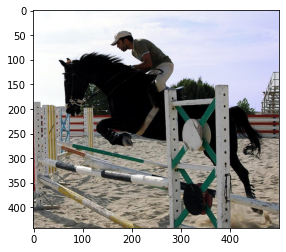

In [5]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np

testImg = plt.imread(img[3])#img[np.random.randint(0,len(img))])
plt.imshow(testImg)

In [11]:
xmlDir = "VOC2012/Annotations/"
annotations = []
for i,x in enumerate(lines):
    annotations.append(xmlDir + x + ".xml")

In [14]:
import pandas as pd
from collections import OrderedDict
import xml.etree.ElementTree as ET

def single_xml_file(tree):
    NumOfObj = 0
    row = OrderedDict()
    
    for elements in tree.iter():
        if elements.tag == "size":
            for dimension in elements:
                row[dimension.tag] = int(dimension.text)
        if elements.tag == "object":
            for obj in elements:
                if obj.tag == "name":
                    row["bbx_{}_name".format(NumOfObj)] = str(obj.text)
                if obj.tag == "bndbox":
                    for i in obj:
                        row["bbx_{}_{}".format(NumOfObj, i.tag)] = int(i.text)
                    NumOfObj += 1
    row["NumOfObj"] = NumOfObj
    return row

df_annotation = []
for x in lines:
    tree = ET.parse(xmlDir + x + '.xml')
    row = single_xml_file(tree)
    row["fileID"] = x
    df_annotation.append(row)
df_annotation = pd.DataFrame(df_annotation)

In [15]:
df_annotation.head()

,width,height,depth,bbx_0_name,bbx_0_xmin,bbx_0_ymin,bbx_0_xmax,bbx_0_ymax,NumOfObj,fileID,...,bbx_54_name,bbx_54_xmin,bbx_54_ymin,bbx_54_xmax,bbx_54_ymax,bbx_55_name,bbx_55_xmin,bbx_55_ymin,bbx_55_xmax,bbx_55_ymax
0,500,375,3,tvmonitor,34,11,448,293,1,2008_000002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500,333,3,train,46,11,500,333,2,2008_000003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500,375,3,boat,1,230,428,293,1,2008_000007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500,442,3,horse,53,87,471,420,2,2008_000008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500,375,3,cow,217,161,294,221,2,2008_000009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_annotation[~df_annotation['bbx_55_ymin'].isnull()]

,width,height,depth,bbx_0_name,bbx_0_xmin,bbx_0_ymin,bbx_0_xmax,bbx_0_ymax,NumOfObj,fileID,...,bbx_54_name,bbx_54_xmin,bbx_54_ymin,bbx_54_xmax,bbx_54_ymax,bbx_55_name,bbx_55_xmin,bbx_55_ymin,bbx_55_xmax,bbx_55_ymax
3495,500,375,3,sheep,411,172,445,195,56,2008_007069,...,sheep,234.0,166.0,246.0,177.0,sheep,422.0,199.0,452.0,250.0


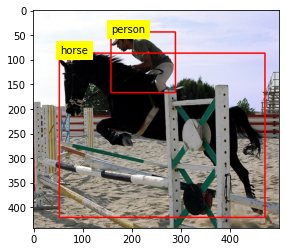

In [20]:
randomImg = 3 #np.random.randint(0, df_annotation.shape[0])

row = df_annotation.iloc[randomImg,:]
im = plt.imread(imgDir + row["fileID"] + ".jpg")

for x in range(row["NumOfObj"]):
    name = row["bbx_{}_name".format(x)]
    xmin = int(row["bbx_{}_xmin".format(x)])
    xmax = int(row["bbx_{}_xmax".format(x)])
    ymin = int(row["bbx_{}_ymin".format(x)])
    ymax = int(row["bbx_{}_ymax".format(x)])
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    plt.text(xmin,ymin, name, fontsize=10, backgroundcolor="yellow")
plt.imshow(im)

